# **Problem Statement**

Create a K-means clustering algorithm to group customers of a retail store based on their purchase history(i.e., Spending Score).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.cluster import KMeans

In [3]:
df=pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv',index_col='CustomerID')
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


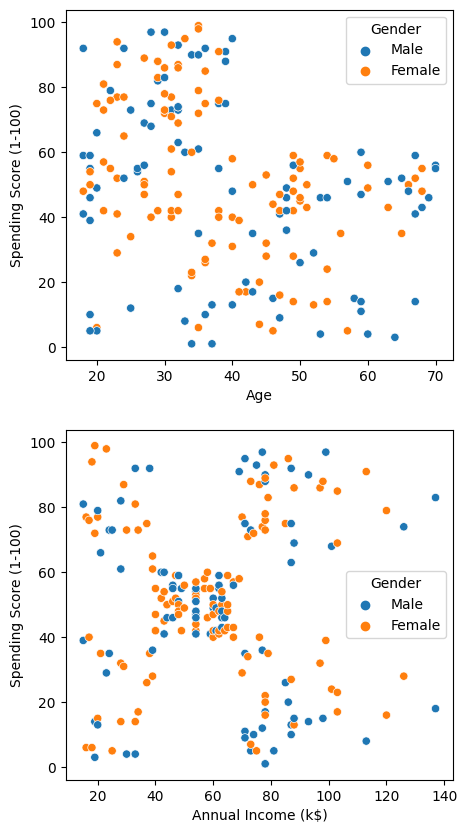

In [4]:
fig,ax=plt.subplots(2,figsize=(5,10))
sns.scatterplot(ax=ax[0],data=df,x='Age',y='Spending Score (1-100)',hue='Gender')
sns.scatterplot(ax=ax[1],data=df,x='Annual Income (k$)',y='Spending Score (1-100)',hue='Gender')
plt.show()

In [ ]:
km=KMeans(n_clusters=5)
df['cluster']=km.fit_predict(df[['Annual Income (k$)','Spending Score (1-100)']])

In [22]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
CustomerID,,,,,
1,Male,19,15,39,0
2,Male,21,15,81,3
3,Female,20,16,6,0
4,Female,23,16,77,3
5,Female,31,17,40,0


In [6]:
km.cluster_centers_

array([[25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348]])

In [7]:
km.inertia_

44448.45544793371

In [8]:
df['cluster'].unique()

array([4, 0, 2, 3, 1], dtype=int32)

In [9]:
df0=df[df['cluster']==0][['Annual Income (k$)','Spending Score (1-100)','cluster']]
df1=df[df['cluster']==1][['Annual Income (k$)','Spending Score (1-100)','cluster']]
df2=df[df['cluster']==2][['Annual Income (k$)','Spending Score (1-100)','cluster']]
df3=df[df['cluster']==3][['Annual Income (k$)','Spending Score (1-100)','cluster']]
df4=df[df['cluster']==4][['Annual Income (k$)','Spending Score (1-100)','cluster']]

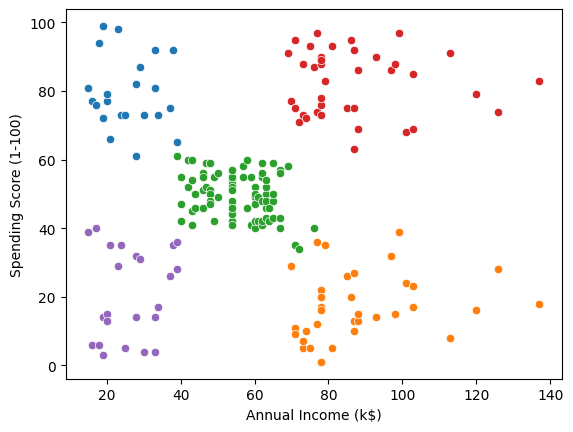

In [26]:
sns.scatterplot(data=df0,x='Annual Income (k$)',y='Spending Score (1-100)')
sns.scatterplot(data=df1,x='Annual Income (k$)',y='Spending Score (1-100)')
sns.scatterplot(data=df2,x='Annual Income (k$)',y='Spending Score (1-100)')
sns.scatterplot(data=df3,x='Annual Income (k$)',y='Spending Score (1-100)')
sns.scatterplot(data=df4,x='Annual Income (k$)',y='Spending Score (1-100)')
plt.show()

In [ ]:
sse=[]
for k in range(1,20):
    kmk=KMeans(n_clusters=k)
    kmk.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    sse.append(kmk.inertia_)

In [12]:
sse

[269981.28,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30259.65720728547,
 25028.020475269415,
 21829.13563877983,
 19653.383606248826,
 17602.19046838677,
 15817.740201007087,
 14272.165469824293,
 12882.609714044822,
 12047.730965671755,
 10893.92052947053,
 10461.338073593075,
 9618.004248117613,
 8529.823455775688]

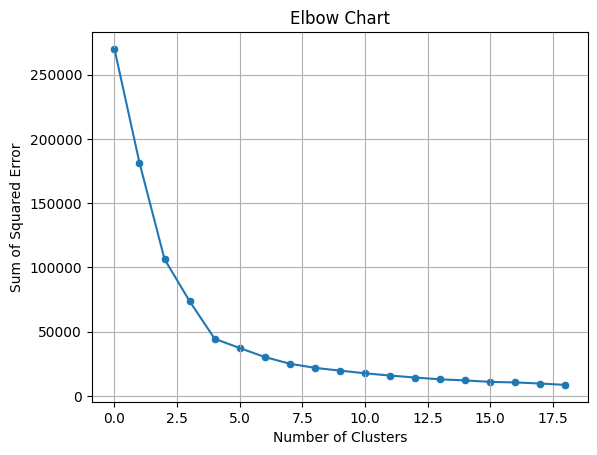

In [29]:
sns.lineplot(data=sse)
sns.scatterplot(data=sse)
plt.grid(True)
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Error')
plt.title('Elbow Chart')
plt.show()

*From the above **Elbow Chart** we can use 5 as number of clusters for better clustering or categorization.*

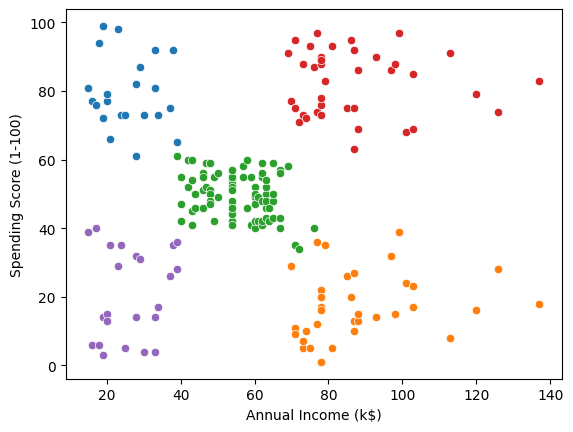

In [25]:
sns.scatterplot(data=df0,x='Annual Income (k$)',y='Spending Score (1-100)')
sns.scatterplot(data=df1,x='Annual Income (k$)',y='Spending Score (1-100)')
sns.scatterplot(data=df2,x='Annual Income (k$)',y='Spending Score (1-100)')
sns.scatterplot(data=df3,x='Annual Income (k$)',y='Spending Score (1-100)')
sns.scatterplot(data=df4,x='Annual Income (k$)',y='Spending Score (1-100)')
plt.show()

# **Conclusion**

* Target Audience is the one having Spending Score greater than 60.
* We can't decide the Spending Score just based on their Annual Income. (as shown in above fig.)